<a href="https://colab.research.google.com/github/huynhspm/Machine_Learning/blob/main/Perceptron%20Learning%20Algorithm/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import lib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression 

np.random.seed(2)

In [2]:
# function to plot data points
def visualize_data(x, y):
    x0 = x[y[:, 0] == -1, :]
    x1 = x[y[:, 0] == 1, :]
    
    plt.plot(x0[:, 0], x0[:, 1], 'g^', markersize = 7)
    plt.plot(x1[:, 0], x1[:, 1], 'bs', markersize = 7)
    plt.axis([0, 6, 0, 4])
    plt.xlabel('x1')
    plt.ylabel('x2')

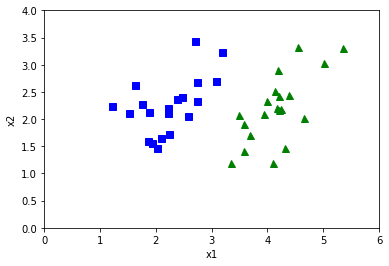

In [3]:
means = [[2, 2], [4, 2]]
cov = [[.3, .2], [.2, .3]]
m = 20  # number of points per class
x0 = np.random.multivariate_normal(means[0], cov, m) # class -1 
x1 = np.random.multivariate_normal(means[1], cov, m) # class 1 

x = np.concatenate((x0, x1), axis = 0) # all data
y = np.concatenate((np.ones((m, 1)), -1*np.ones((m, 1))), axis = 0) # labels 
visualize_data(x, y) # plot data

In [4]:
# predict label
def predict(w, x):    
    return np.sign(np.dot(x, w))

# check if the algorithm has converged
def has_converged(x, y, w):    
    return np.array_equal(predict(w, x), y) 

In [5]:
# Add a column-bias (full 1) to x
X = np.concatenate((np.ones((2*m, 1)), x), axis = 1)

N = X.shape[0]
d = X.shape[1]
mis_points = []
cost = []

# initial value of parameter 
w = np.random.randn(d, 1)

print(X.shape, y.shape, w.shape)

(40, 3) (40, 1) (3, 1)


In [6]:
while True:
    mix_id = np.random.permutation(N)     # mix data 
    for i in range(N):
        xi = X[mix_id[i], :].reshape(1, d)
        yi = y[mix_id[i]]

        if predict(w, xi)[0] != yi: # misclassified point
            w = w + yi*xi.T         # Gradient descent 

    if has_converged(X, y, w):      # check if the algorithm has converged
        break

In [7]:
# function to plot boundary of two classes
def visualize_boundary(w):   
    print(w.shape) 
    x = np.arange(1, 6, 1)
    y = -(w[0, 0] + w[1, 0]*x)/w[2, 0]
    plt.plot(x, y, linewidth = 3)
    
def display_result(w, x, y):
    print(x.shape, y.shape)
    visualize_data(x, y)
    visualize_boundary(w)
    plt.xlabel('Ox')
    plt.ylabel('Oy')

w = : [[ 1.81053074 -3.19879721  3.80633094]]
(40, 2) (40, 1)
(3, 1)


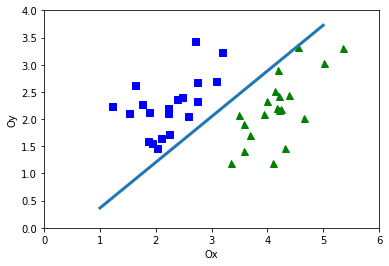

In [9]:
print('w = :', w.T)
display_result(w, x, y) # show result